# 데이터 증강O

훈련 후 h5 저장

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# 데이터 경로
train_data_dir = '/content/dataset'

# 데이터 증강
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)

# 훈련 데이터 생성
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# 검증 데이터 생성
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# CNN 모델 생성
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
model.fit(train_generator, epochs=10, validation_data=validation_generator)

# 모델을 H5 파일로 저장
#model.save('CNN_증강.h5')

# epoch = 10 --> 72.06%

Found 992 images belonging to 5 classes.
Found 247 images belonging to 5 classes.
Epoch 1/10
31/31 [==============================] - 21s 488ms/step - loss: 1.5241 - accuracy: 0.2661 - val_loss: 1.3827 - val_accuracy: 0.3644
Epoch 2/10
31/31 [==============================] - 15s 473ms/step - loss: 1.3029 - accuracy: 0.3710 - val_loss: 1.1897 - val_accuracy: 0.5385
Epoch 3/10
31/31 [==============================] - 15s 481ms/step - loss: 1.1692 - accuracy: 0.4798 - val_loss: 1.2315 - val_accuracy: 0.4615
Epoch 4/10
31/31 [==============================] - 15s 477ms/step - loss: 1.0701 - accuracy: 0.5585 - val_loss: 1.0548 - val_accuracy: 0.5506
Epoch 5/10
31/31 [==============================] - 15s 486ms/step - loss: 0.8596 - accuracy: 0.6472 - val_loss: 1.0743 - val_accuracy: 0.5789
Epoch 6/10
31/31 [==============================] - 15s 471ms/step - loss: 0.8150 - accuracy: 0.6552 - val_loss: 1.2001 - val_accuracy: 0.5263
Epoch 7/10
31/31 [==============================] - 15s 484m

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


훈련 후 확률 출력

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# 데이터 경로
train_data_dir = '/content/dataset'

# 데이터 증강
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2
                                    )

# 훈련 데이터 생성
train_generator = train_datagen.flow_from_directory(
      train_data_dir,
       target_size=(224, 224),
       batch_size=32,
       class_mode='categorical',
       subset='training'
)

# 검증 데이터 생성
validation_generator = train_datagen.flow_from_directory(
       train_data_dir,
       target_size=(224, 224),
       batch_size=32,
       class_mode='categorical',
       subset='validation'
   )

# CNN 모델 생성
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
model.fit(train_generator, epochs=10, validation_data=validation_generator)

# epoch = 10 --> %

Found 992 images belonging to 5 classes.
Found 247 images belonging to 5 classes.
Epoch 1/10
31/31 [==============================] - 17s 504ms/step - loss: 1.5424 - accuracy: 0.3095 - val_loss: 1.3375 - val_accuracy: 0.3482
Epoch 2/10
31/31 [==============================] - 17s 543ms/step - loss: 1.2581 - accuracy: 0.4123 - val_loss: 1.1750 - val_accuracy: 0.4737
Epoch 3/10
31/31 [==============================] - 18s 585ms/step - loss: 1.1025 - accuracy: 0.5312 - val_loss: 1.1242 - val_accuracy: 0.5668
Epoch 4/10
31/31 [==============================] - 16s 506ms/step - loss: 0.9955 - accuracy: 0.5978 - val_loss: 1.0261 - val_accuracy: 0.6194
Epoch 5/10
31/31 [==============================] - 16s 508ms/step - loss: 0.8763 - accuracy: 0.6391 - val_loss: 1.1148 - val_accuracy: 0.5628
Epoch 6/10
31/31 [==============================] - 17s 552ms/step - loss: 0.7843 - accuracy: 0.6925 - val_loss: 0.9959 - val_accuracy: 0.6235
Epoch 7/10
31/31 [==============================] - 15s 492m

# 데이터 증강O & 검증(h5)

Saving 8.jpg to 8.jpg


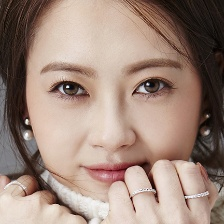

1/1 [==============================] - 0s 73ms/step
예측된 사상 체질은 : 소음인
예측 확률은 : 86.74%


In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from IPython.display import display, Image
from google.colab import files

loaded_model = load_model('/content/CNN_증강O.h5')
uploaded = files.upload()

uploaded_files = list(uploaded.keys())
uploaded_image_path = uploaded_files[0] if uploaded_files else None

if uploaded_image_path:
    display(Image(filename=uploaded_image_path, width=224, height=224))
else:
    print("이미지를 업로드해주세요.")

img = image.load_img(uploaded_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) / 255.0

predictions = loaded_model.predict(img_array)

predicted_class_index = tf.argmax(predictions[0]).numpy()

# 클래스 인덱스를 해당 클래스 레이블로 매핑
class_labels = train_generator.class_indices
predicted_class_label = [k for k, v in class_labels.items() if v == predicted_class_index][0]

predicted_probability = predictions[0][predicted_class_index] * 100

print(f"예측된 사상 체질은 : {predicted_class_label}")
print(f"예측 확률은 : {predicted_probability:.2f}%")


# 데이터 증강X

훈련 후 h5 파일 저장

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# 데이터 경로
train_data_dir = '/content/dataset'

# 데이터 증강 없음
train_datagen = ImageDataGenerator(rescale=1./255)

# 훈련 데이터 생성
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# 검증 데이터 생성
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# CNN 모델 생성
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
model.fit(train_generator, epochs=5, validation_data=validation_generator)

# 모델을 H5 파일로 저장
model.save('CNN_증강X.h5')

## epoch = 10 --> 100%

## epoch = 5 --> 98%
## --> epoch 수정 필요

Found 1239 images belonging to 5 classes.
Found 0 images belonging to 5 classes.
Epoch 1/5
39/39 [==============================] - 4s 60ms/step - loss: 1.5310 - accuracy: 0.3551
Epoch 2/5
39/39 [==============================] - 3s 63ms/step - loss: 0.8842 - accuracy: 0.6376
Epoch 3/5
39/39 [==============================] - 3s 77ms/step - loss: 0.4541 - accuracy: 0.8410
Epoch 4/5
39/39 [==============================] - 2s 58ms/step - loss: 0.1612 - accuracy: 0.9516
Epoch 5/5
39/39 [==============================] - 2s 52ms/step - loss: 0.0861 - accuracy: 0.9814


훈련 후 확률 출력

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# 데이터 경로
train_data_dir = '/content/dataset'

# 데이터 증강 없음
train_datagen = ImageDataGenerator(rescale=1./255)

# 훈련 데이터 생성
train_generator = train_datagen.flow_from_directory(
      train_data_dir,
      target_size=(224, 224),
      batch_size=32,
      class_mode='categorical',
      subset='training'
)

# 검증 데이터 생성
validation_generator = train_datagen.flow_from_directory(
       train_data_dir,
       target_size=(224, 224),
       batch_size=32,
       class_mode='categorical',
       subset='validation'
   )

# CNN 모델 생성
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
model.fit(train_generator, epochs=5, validation_data=validation_generator)


Found 1239 images belonging to 5 classes.
Found 0 images belonging to 5 classes.
Epoch 1/5
39/39 [==============================] - 4s 55ms/step - loss: 1.4242 - accuracy: 0.3374
Epoch 2/5
39/39 [==============================] - 2s 57ms/step - loss: 0.8926 - accuracy: 0.6384
Epoch 3/5
39/39 [==============================] - 3s 69ms/step - loss: 0.4343 - accuracy: 0.8483
Epoch 4/5
39/39 [==============================] - 3s 64ms/step - loss: 0.1434 - accuracy: 0.9556
Epoch 5/5
39/39 [==============================] - 2s 60ms/step - loss: 0.0499 - accuracy: 0.9847


# # 데이터 증강X & 검증(h5)

Saving 2022_03_11_00_50_IMG_5457.JPG to 2022_03_11_00_50_IMG_5457.JPG


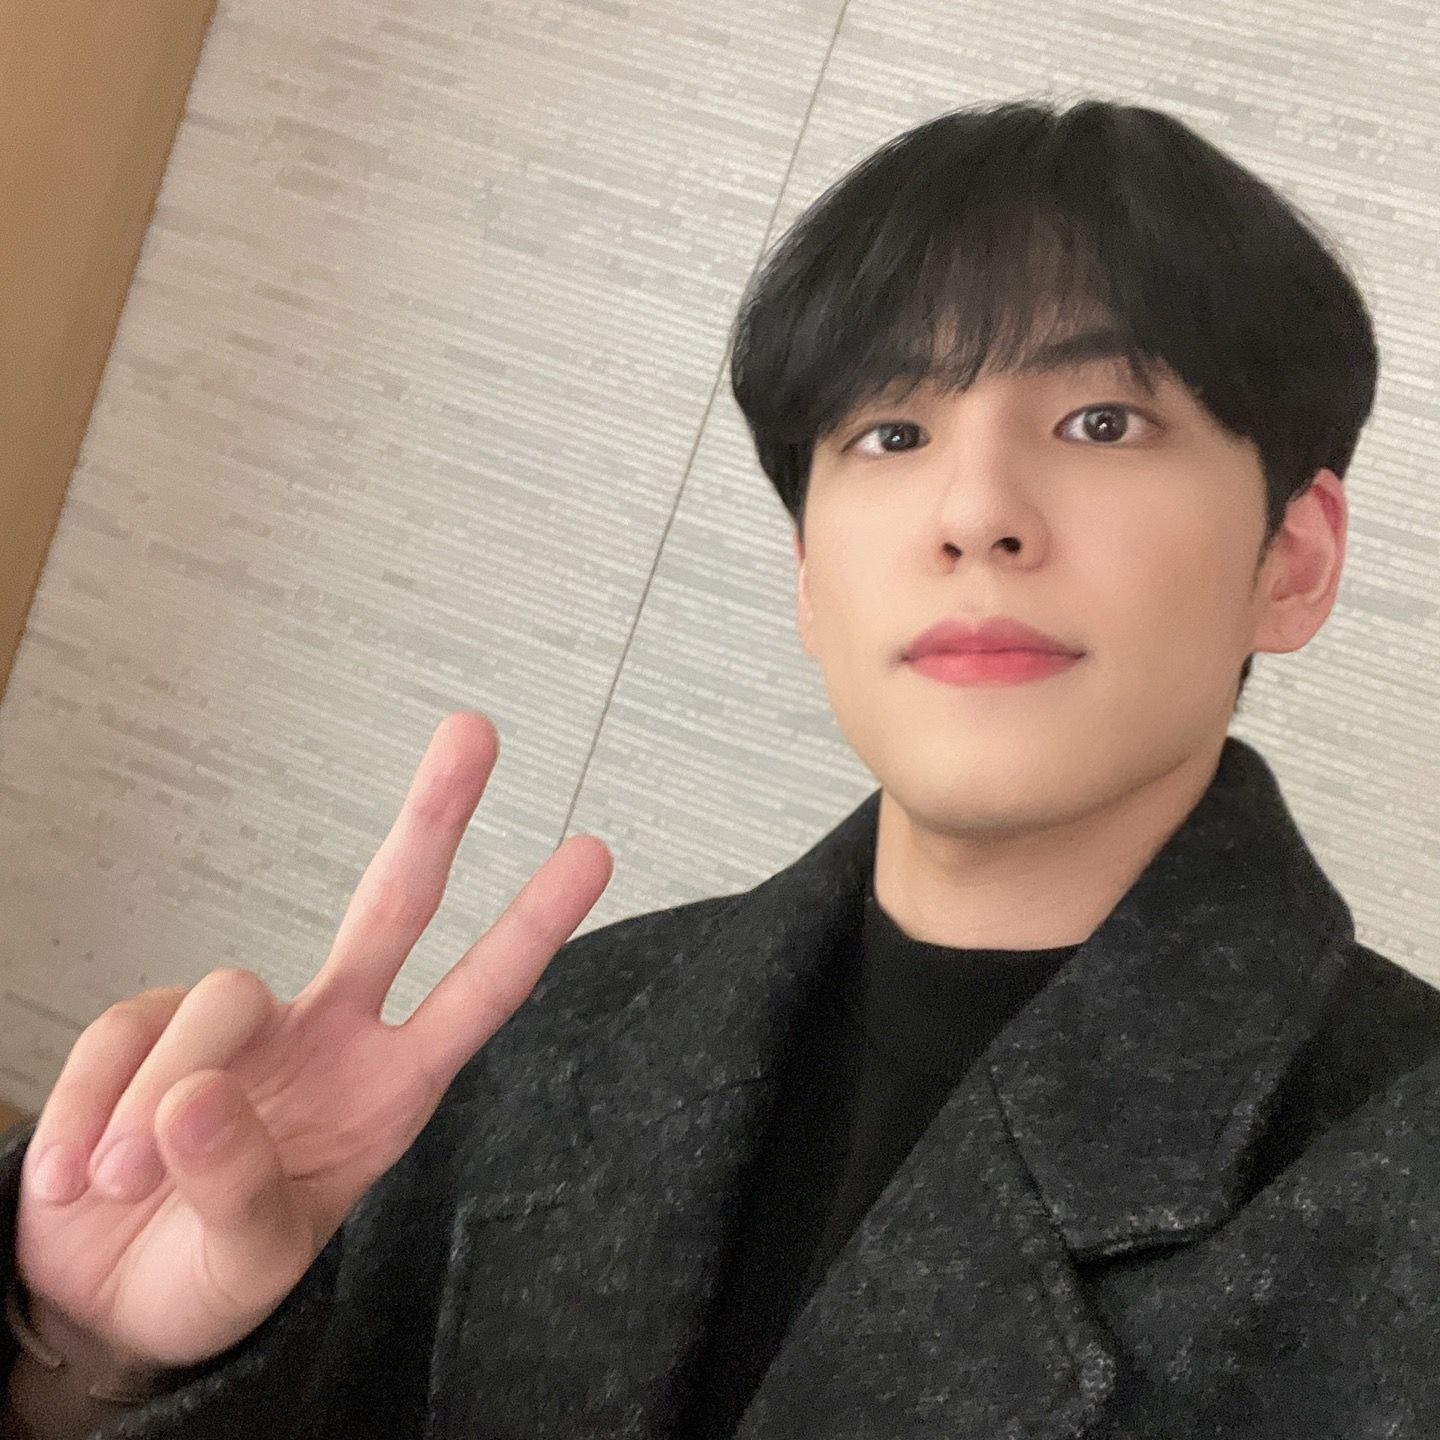

1/1 [==============================] - 0s 356ms/step
Predicted class: 소양인
Predicted probability: 55.81%


In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from IPython.display import display, Image
from google.colab import files

loaded_model = load_model('/content/CNN_증강X.h5')

uploaded = files.upload()

uploaded_files = list(uploaded.keys())
uploaded_image_path = uploaded_files[0] if uploaded_files else None

if uploaded_image_path:
    display(Image(filename=uploaded_image_path, width=224, height=224))
else:
    print("이미지를 업로드 해주세요.")

img = image.load_img(uploaded_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) / 255.0


predictions = loaded_model.predict(img_array)

predicted_class_index = tf.argmax(predictions[0]).numpy()


# 클래스 인덱스를 해당 클래스 레이블로 매핑
class_labels = train_generator.class_indices
predicted_class_label = [k for k, v in class_labels.items() if v == predicted_class_index][0]


predicted_probability = predictions[0][predicted_class_index] * 100

print(f"예측된 사상 체질은 : {predicted_class_label}")
print(f"예측 확률은 : {predicted_probability:.2f}%")


---------------------------------------------------------------------------------------------------------------

# 모델 구조 출력_데이터 증강



In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# 데이터 경로
train_data_dir = '/content/dataset'

# 데이터 증강
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)

# 훈련 데이터 생성
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# 검증 데이터 생성
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# CNN 모델 생성
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 구조
model.summary()


Found 992 images belonging to 5 classes.
Found 247 images belonging to 5 classes.
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 52, 52, 128)       73856     
                                      

# 모델 구조 출력_데이터 증강X

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# 데이터 경로
train_data_dir = '/content/dataset'

# 데이터 증강 없음
train_datagen = ImageDataGenerator(rescale=1./255)

# 훈련 데이터 생성
train_generator = train_datagen.flow_from_directory(
      train_data_dir,
      target_size=(224, 224),
      batch_size=32,
      class_mode='categorical',
      subset='training'
)

# 검증 데이터 생성
validation_generator = train_datagen.flow_from_directory(
       train_data_dir,
       target_size=(224, 224),
       batch_size=32,
       class_mode='categorical',
       subset='validation'
   )

# CNN 모델 생성
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 구조 출력
model.summary()


Found 1239 images belonging to 5 classes.
Found 0 images belonging to 5 classes.
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 52, 52, 128)       73856     
                                       